In [1]:
import matplotlib.pyplot as plt
from gerrychain import (Partition, Graph, MarkovChain,
                        updaters, constraints, accept,
                        GeographicPartition)
from gerrychain.proposals import recom
from gerrychain.tree import bipartition_tree
from gerrychain.constraints import contiguous
from functools import partial
import pandas
import geopandas as gpd

# Set the random seed so that the results are reproducible!
import random
random.seed(42)

In [8]:
gdf = gpd.read_file("../data/MN_precincts.geojson")
# gdf = gpd.read_file("../data/TX_vtds/TX_VTDs.geojson")
# gdf['geometry'] = gdf['geometry'].buffer(0)

# print("Current CRS:", gdf.crs)
# gdf = gdf.to_crs(epsg=32617)
# print("New CRS:", gdf.crs)

gdf.columns

Index(['VTDID', 'PCTNAME', 'PCTCODE', 'MCDNAME', 'MCDCODE', 'CTU_TYPE',
       'COUNTYNAME', 'COUNTYFIPS', 'CONGDIST', 'MNSENDIST', 'MNLEGDIST',
       'CTYCOMDIST', 'JUDDIST', 'TOTVOT16', 'PRES16R', 'PRES16D', 'PRES16G',
       'PRES16I', 'PRES16L', 'USH16R', 'USH16D', 'SSEN16R', 'SSEN16D', 'SH16R',
       'SH16D', 'TOTPOP', 'NH_WHITE', 'NH_BLACK', 'NH_AMIN', 'NH_ASIAN',
       'NH_NHPI', 'NH_OTHER', 'NH_2MORE', 'HISP', 'H_WHITE', 'H_BLACK',
       'H_AMIN', 'H_ASIAN', 'H_NHPI', 'H_OTHER', 'H_2MORE', 'VAP', 'HVAP',
       'WVAP', 'BVAP', 'AMINVAP', 'ASIANVAP', 'NHPIVAP', 'OTHERVAP',
       '2MOREVAP', 'geometry'],
      dtype='object')

In [9]:
graph = Graph.from_geodataframe(gdf)

In [10]:
my_updaters = {
    "population": updaters.Tally("TOTPOP", alias="population"),
    "cut_edges": updaters.cut_edges,
    "perimeter": updaters.perimeter,
    "area": updaters.Tally("area", alias="area"),
    "geometry": updaters.boundary_nodes,
}

initial_partition = GeographicPartition(
    graph,
    assignment="MNLEGDIST",
    # assignment="USCD",
    updaters=my_updaters
)

print(initial_partition["perimeter"]['4'])

KeyError: '4'

{4096, 1026, 1027, 1033, 1037, 1039, 1040, 1049, 1051, 1053, 1063, 1068, 1083, 4012, 1099, 1611, 2125, 1102, 1615, 1616, 1618, 2132, 1621, 599, 1111, 1625, 1114, 2139, 3783, 605, 1118, 1631, 1633, 1122, 1634, 614, 616, 619, 620, 1133, 2159, 3187, 3188, 3788, 1145, 1146, 1147, 3193, 637, 1151, 3203, 1156, 3205, 646, 3206, 1160, 649, 650, 2185, 652, 653, 654, 2698, 3217, 2707, 660, 661, 662, 2709, 2201, 2202, 667, 3226, 3227, 670, 2211, 2212, 2724, 2725, 2727, 3235, 3236, 3238, 2731, 2734, 3758, 3763, 3764, 3766, 2746, 3770, 2748, 3776, 709, 710, 711, 712, 713, 714, 715, 716, 717, 718, 719, 720, 721, 2763, 2765, 3279, 3281, 3282, 2775, 3283, 3288, 3795, 3796, 3799, 3293, 3294, 3803, 3804, 3297, 3298, 2787, 3299, 2789, 2790, 3301, 2793, 3306, 3307, 3308, 3312, 3313, 3314, 3315, 2806, 1788, 1789, 2812, 1791, 2814, 1793, 1794, 2815, 3857, 2322, 2834, 3862, 2844, 2845, 3358, 3876, 2342, 2343, 2344, 2345, 2348, 3892, 3893, 3894, 3899, 324, 325, 3909, 329, 1869, 1870, 3917, 3408, 337, 338, 339

<Axes: title={'center': 'Initial Partition in MN'}>

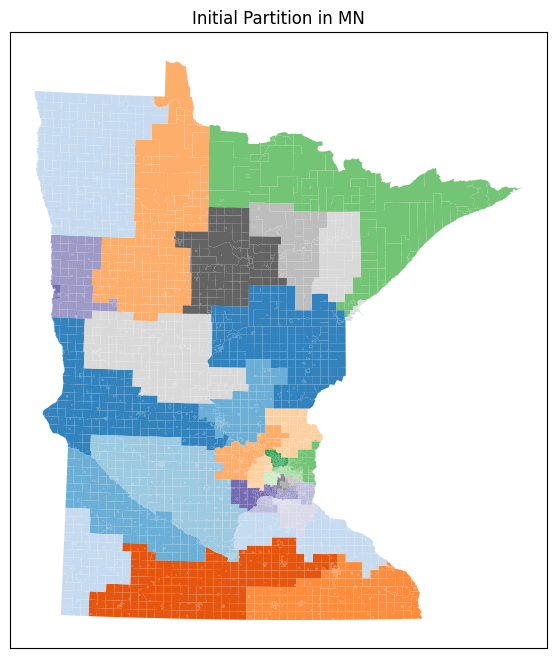

In [11]:
print(initial_partition.geometry)
fig, ax = plt.subplots(figsize=(8,8))
ax.set_yticks([])
ax.set_xticks([])
ax.set_title("Initial Partition in MN")
initial_partition.plot(ax=ax, cmap='tab20c')

In [17]:
ideal_population = sum(initial_partition["population"].values()) / len(initial_partition)


proposal = partial(
    recom,
    pop_col="TOTPOP",
    pop_target=ideal_population,
    epsilon=0.01,
    node_repeats=2,
)

recom_chain = MarkovChain(
    proposal=proposal,
    constraints=[contiguous],
    accept=accept.always_accept,
    initial_state=initial_partition,
    total_steps=1000,
)

In [15]:
print(recom_chain)

for i, partition in enumerate(recom_chain):
    print(i, partition)

<MarkovChain [100 steps]>
0 <GeographicPartition [134 parts]>
1 <GeographicPartition [134 parts]>
2 <GeographicPartition [134 parts]>
3 <GeographicPartition [134 parts]>
4 <GeographicPartition [134 parts]>
5 <GeographicPartition [134 parts]>
6 <GeographicPartition [134 parts]>
7 <GeographicPartition [134 parts]>
8 <GeographicPartition [134 parts]>
9 <GeographicPartition [134 parts]>
10 <GeographicPartition [134 parts]>
11 <GeographicPartition [134 parts]>
12 <GeographicPartition [134 parts]>
13 <GeographicPartition [134 parts]>
14 <GeographicPartition [134 parts]>
15 <GeographicPartition [134 parts]>
16 <GeographicPartition [134 parts]>
17 <GeographicPartition [134 parts]>
18 <GeographicPartition [134 parts]>
19 <GeographicPartition [134 parts]>
20 <GeographicPartition [134 parts]>
21 <GeographicPartition [134 parts]>
22 <GeographicPartition [134 parts]>
23 <GeographicPartition [134 parts]>
24 <GeographicPartition [134 parts]>
25 <GeographicPartition [134 parts]>
26 <GeographicPartitio

/opt/homebrew/lib/python3.11/site-packages/gerrychain/tree.py:427: BipartitionWarning: 
Failed to find a balanced cut after 50 attempts.
If possible, consider enabling pair reselection within your
MarkovChain proposal method to allow the algorithm to select
a different pair of districts to try and recombine.
  warnings.warn(


52 <GeographicPartition [134 parts]>
53 <GeographicPartition [134 parts]>
54 <GeographicPartition [134 parts]>
55 <GeographicPartition [134 parts]>
56 <GeographicPartition [134 parts]>
57 <GeographicPartition [134 parts]>
58 <GeographicPartition [134 parts]>
59 <GeographicPartition [134 parts]>
60 <GeographicPartition [134 parts]>
61 <GeographicPartition [134 parts]>
62 <GeographicPartition [134 parts]>
63 <GeographicPartition [134 parts]>
64 <GeographicPartition [134 parts]>
65 <GeographicPartition [134 parts]>
66 <GeographicPartition [134 parts]>
67 <GeographicPartition [134 parts]>
68 <GeographicPartition [134 parts]>
69 <GeographicPartition [134 parts]>
70 <GeographicPartition [134 parts]>
71 <GeographicPartition [134 parts]>
72 <GeographicPartition [134 parts]>
73 <GeographicPartition [134 parts]>
74 <GeographicPartition [134 parts]>
75 <GeographicPartition [134 parts]>
76 <GeographicPartition [134 parts]>
77 <GeographicPartition [134 parts]>
78 <GeographicPartition [134 parts]>
7

In [18]:
%matplotlib inline
import matplotlib_inline.backend_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('png')

import pandas as pd

import matplotlib.cm as mcm
import matplotlib.pyplot as plt
import networkx as nx
from PIL import Image
import io
import ipywidgets as widgets
from IPython.display import display, clear_output

frames = []
district_data = []

for i, partition in enumerate(recom_chain):
    for district_name in partition.perimeter.keys():
        population = partition.population[district_name]
        perimeter = partition.perimeter[district_name]
        area = partition.area[district_name]
        exterior_boundaries = partition.exterior_boundaries[district_name]
        interior_boundaries = partition.interior_boundaries[district_name]
        # boundry_nodes = partition.boundry_nodes[district_name]
        # cut_edges = partition.cut_edges[district_name]
        cut_edges_by_part = partition.cut_edges_by_part[district_name]
        district_data.append((i, district_name, population, perimeter, area, exterior_boundaries, interior_boundaries, cut_edges_by_part))

    buffer = io.BytesIO()
    fig, ax = plt.subplots(figsize=(10,10))
    partition.plot(ax=ax, cmap='tab20')
    ax.set_xticks([])
    ax.set_yticks([])
    plt.savefig(buffer, format='png', bbox_inches='tight')
    buffer.seek(0)
    image = Image.open(buffer)
    frames.append(image)
    plt.close(fig)

df = pd.DataFrame(
    district_data,
    columns=[
        'step',
        'district_name',
        'population',
        'perimeter',
        'area',
        'exterior_boundaries',
        'interior_boundaries',
        'cut_edges_by_part'
    ]
)

def show_frame(idx):
    clear_output(wait=True)
    display(frames[idx])

slider = widgets.IntSlider(value=0, min=0, max=len(frames)-1, step=1, description='Frame:')
slider.layout.width = '500px'
widgets.interactive(show_frame, idx=slider)

/opt/homebrew/lib/python3.11/site-packages/gerrychain/tree.py:427: BipartitionWarning: 
Failed to find a balanced cut after 50 attempts.
If possible, consider enabling pair reselection within your
MarkovChain proposal method to allow the algorithm to select
a different pair of districts to try and recombine.
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/gerrychain/tree.py:427: BipartitionWarning: 
Failed to find a balanced cut after 50 attempts.
If possible, consider enabling pair reselection within your
MarkovChain proposal method to allow the algorithm to select
a different pair of districts to try and recombine.
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/gerrychain/tree.py:427: BipartitionWarning: 
Failed to find a balanced cut after 50 attempts.
If possible, consider enabling pair reselection within your
MarkovChain proposal method to allow the algorithm to select
a different pair of districts to try and recombine.
  warnings.warn(
/opt/homebrew/lib/p

interactive(children=(IntSlider(value=0, description='Frame:', layout=Layout(width='500px'), max=999), Output(…

In [42]:
df

,step,district_name,population,perimeter,area,exterior_boundaries,interior_boundaries,cut_edges_by_part
0,0,8,662998.0,1.804646e+06,7.807545e+10,1.133129e+06,6.715165e+05,"{(161, 621), (1923, 1989), (621, 3879), (3717,..."
1,0,6,662979.0,6.616450e+05,7.864760e+09,2.150932e+04,6.401357e+05,"{(67, 123), (161, 621), (2083, 4086), (3537, 3..."
2,0,5,662985.0,1.133867e+05,3.678103e+08,0.000000e+00,1.133867e+05,"{(1300, 1303), (179, 2906), (1244, 1536), (147..."
3,0,3,662994.0,2.625007e+05,1.509425e+09,0.000000e+00,2.625007e+05,"{(67, 123), (1244, 1536), (1202, 3452), (90, 1..."
4,0,7,662997.0,2.288428e+06,9.165192e+10,1.265817e+06,1.022611e+06,"{(2083, 4086), (3537, 3541), (403, 3089), (192..."
...,...,...,...,...,...,...,...,...
155,19,3,669643.0,3.480803e+05,1.719961e+09,-2.910383e-11,3.480803e+05,"{(67, 123), (1244, 1536), (1202, 3452), (90, 1..."
156,19,7,669884.0,6.814536e+05,8.663901e+09,2.150932e+04,6.599442e+05,"{(67, 123), (161, 621), (75, 179), (2082, 2098..."
157,19,1,665894.0,5.251026e+05,5.112330e+09,6.534633e+04,4.597563e+05,"{(898, 945), (3867, 3868), (1478, 2969), (1202..."
158,19,2,658151.0,1.415584e+06,3.111006e+10,5.206704e+05,8.949135e+05,"{(1792, 1796), (3124, 3531), (2411, 2417), (11..."
